In [6]:
!git clone https://github.com/Miamoto/fruit-classifier

fatal: destination path 'fruit-classifier' already exists and is not an empty directory.


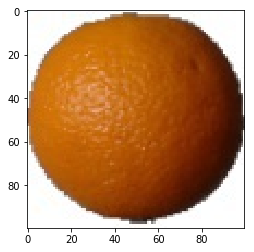

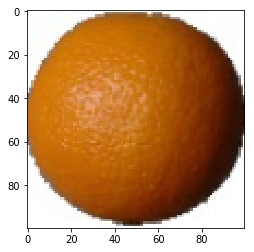

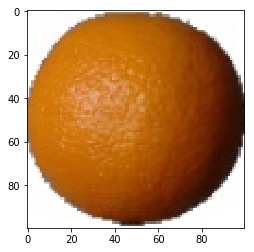

y_train [3 2 2 ... 1 1 2]
Shape of train images is: (1333, 224, 224, 3)
Shape of validation image (572, 224, 224, 3)
Shape of labels is: (1333,)
Shape of label (572,)


C:\Users\anama\Anaconda3\lib\site-packages\keras_applications\mobilenet.py:208: UserWarning: MobileNet shape is undefined. Weights for input shape (224, 224) will be loaded.
  warnings.warn('MobileNet shape is undefined.'


17227776/17225924 [==============================] - 7s 0us/step


In [13]:
# -*- coding: utf-8 -*-
"""
Created on Thu May 23 11:07:57 2019

@author: anama
"""

import numpy as np
import keras
from keras import backend as K
from keras.applications import imagenet_utils
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from keras.layers import Input, Dense, GlobalAveragePooling2D
from keras.layers import Dense,Activation, Dropout
from keras.callbacks import ModelCheckpoint
from keras.optimizers import Adam
from IPython.display import display 
from PIL import Image
import cv2
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from keras.applications.mobilenet import MobileNet

train_data_dir = "fruit-classifier/dataset/Training"
test_data_dir = "fruit-classifier/dataset/Test"
weights_filename = "weights.hdf5"


nb_batch_size = 16

# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import random
import gc

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os

# Any results you write to the current directory are saved as output.

list_apples = ['Apple Crimson Snow','Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith', 'Apple Red 1'
, 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious', 'Apple Red Yellow 1', 'Apple Red Yellow 2' ]


list_lemons = ['Lemon', 'Lemon Meyer']
list_pears = ['Pear Abate', 'Pear Kaiser', 'Pear Monster', 'Pear Red','Pear Williams']
def process_images(lst, root_dir):
    res = []
    for obj in lst:
        data_dir = root_dir + '/'+ obj 
        res.append([data_dir + '/{}'.format(i) for i in os.listdir(data_dir)])
    return res

train_apple = process_images(list_apples,train_data_dir)
train_orange = process_images(['Orange'], train_data_dir)
train_lemon = process_images(list_lemons, train_data_dir)
train_pear = process_images(list_pears, train_data_dir)

test_apple = process_images(list_apples,test_data_dir)
test_orange = process_images(['Orange'], test_data_dir)
test_lemon = process_images(list_lemons, test_data_dir)
test_pear = process_images(list_pears, test_data_dir)

test_set = test_orange[:] + test_apple[:] + test_lemon[:] + test_pear[:]
train_set = train_orange[:] + train_apple[:] + train_lemon[:] + train_pear[:]
random.shuffle(train_set)

train_apple = train_apple[0]
train_orange = train_orange[0]
train_lemon = train_lemon[0]
train_pear = train_pear[0]


test_apple = test_apple[0]
test_orange = test_orange[0]
test_lemon = test_lemon[0]
test_pear = test_pear[0]


import matplotlib.image as mpimg
for ima in train_orange[0:3]:
    img = mpimg.imread(ima)
    imgplot = plt.imshow(img)
    plt.show()
    

train_datagen = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input) 

test_datagen = ImageDataGenerator(preprocessing_function=keras.applications.mobilenet.preprocess_input)
nrws = 224
ncolumns = 224
channels = 3


X = [] #images
y = [] #labels

for image in train_apple:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y.append(0)
    
for image in train_orange:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y.append(1)

for image in train_lemon:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y.append(2)
    
for image in train_pear:
    X.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y.append(3)



X = np.array(X)
y = np.array(y)


from sklearn.model_selection import train_test_split
#30% validation set, 70% training set
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.30, random_state=2)

print("y_train", y_train)
print("Shape of train images is:", X_train.shape)
print("Shape of validation image", X_val.shape)
print("Shape of labels is:", y_train.shape)
print("Shape of label", y_val.shape)

num_classes = 4
y_train = to_categorical(y_train, num_classes)
y_val = to_categorical(y_val, num_classes)

train_generator = train_datagen.flow(X_train, y_train,batch_size=nb_batch_size)
validation_generator = train_datagen.flow(X_val, y_val, batch_size=nb_batch_size)


base_model=MobileNet(include_top=False) #imports the mobilenet model and discards the last 1000 neuron layer.

x=base_model.output
x=GlobalAveragePooling2D()(x)
x=Dense(1024,activation='relu')(x) #we add dense layers so that the model can learn more complex functions and classify for better results.
x=Dense(1024,activation='relu')(x) #dense layer 2
x=Dense(512,activation='relu')(x) #dense layer 3
preds=Dense(2,activation='softmax')(x) #final layer with softmax activation


predictions = Dense(4, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

# model.summary()

for layer in mobile.layers:
    layer.trainable = False
    


for layer in model.layers:
    layer.trainable=False
# or if we want to set the first 20 layers of the network to be non-trainable
for layer in model.layers[:20]:
    layer.trainable=False
for layer in model.layers[20:]:
    layer.trainable=True
    
    


In [ ]:
def process_image(file):
    img_path = "MobileNet-inference-images/"
    img = image.load_image(img_path + file, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_expanded = np.expand_dims(img_array, axis=0)
    return keras.applications.mobilenet.preprocess_input(img_expanded)
    
    

In [14]:
import math

nb_layers = len(mobile.layers)

for layer in model.layers[:nb_layers]:
       layer.trainable = False
for layer in model.layers[nb_layers:]:
       layer.trainable = True

# compile the model (should be done *after* setting layers to non-trainable)
model.compile(Adam(lr=0.01), loss='categorical_crossentropy',metrics=['accuracy'])

nb_steps_per_epoch = math.floor(X_train.shape[0]/nb_batch_size)
nb_validation_steps = math.floor(X_val.shape[0]/nb_batch_size)
print(nb_steps_per_epoch)
checkpoint = ModelCheckpoint(weights_filename, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
history = model.fit_generator(train_generator, steps_per_epoch=4, validation_data = validation_generator, 
                               validation_steps=2,epochs=20, verbose=2)

print("fim")

83
Epoch 1/20
 - 57s - loss: 1.3699 - acc: 0.4062 - val_loss: 1.4108 - val_acc: 0.2500
Epoch 2/20
 - 33s - loss: 1.3357 - acc: 0.3750 - val_loss: 1.4443 - val_acc: 0.3438
Epoch 3/20
 - 31s - loss: 1.3193 - acc: 0.3125 - val_loss: 1.4741 - val_acc: 0.2500
Epoch 4/20


KeyboardInterrupt: 

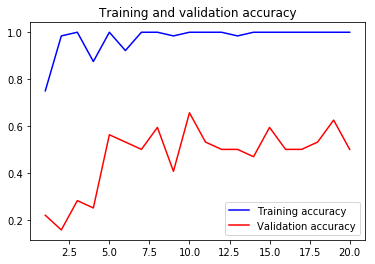

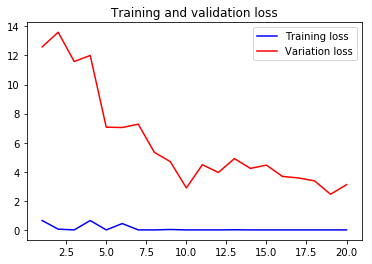

In [0]:
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'b', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()
#Train and validation loss
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Variation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:

X_test = [] #images
y_test = [] #labels

for image in test_apple:
    X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y_test.append(0)
    
for image in test_orange:
    X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y_test.append(1)

for image in test_lemon:
    X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y_test.append(2)
    
for image in test_pear:
    X_test.append(cv2.resize(cv2.imread(image, cv2.IMREAD_COLOR), (nrws,ncolumns), interpolation=cv2.INTER_CUBIC)) #read the image
    y_test.append(3)

""""""
X_test = np.array(X_test)
y_test = np.array(y_test)
y_true = y_test
print("y_true", y_true)
print("y_test", y_test.shape)
y_test = to_categorical(y_test, num_classes)

print("y_test", y_test)
print("y_test", y_test.shape)
print("Shape of test images is:", X_test.shape)


test_generator = test_datagen.flow(X_test, y_test, batch_size=20)
print("fim")

y_true [0 0 0 ... 3 3 3]
y_test (1905,)
y_test [[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 ...
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]
y_test (1905, 4)
Shape of test images is: (1905, 224, 224, 3)
fim


In [0]:
model.load_weights(weights_filename)
predictions = model.predict_generator(test_generator, steps=96, verbose=2)
print(predictions)

In [0]:
import sys
import numpy
numpy.set_printoptions(threshold=sys.maxsize)
                       
y_pred = predictions.argmax(axis=1)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 3, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 2, 0, 0, 0, 2, 0, 2, 0, 0,
       2, 0, 0, 2, 3, 0, 0, 3, 0, 2, 0, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0,
       2, 0, 0, 0, 0, 2, 0, 2, 2, 2, 0, 0, 2, 0, 0, 0, 2, 2, 0, 0, 2, 0,
       2, 0, 3, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0,
       0, 0, 3, 3, 0, 0, 0, 0, 0, 2, 3, 0, 0, 2, 0, 0, 2, 0, 2, 2, 0, 0,
       2, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       3, 0, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0, 0, 3, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 2, 3, 0, 3, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2, 0,
       0, 0, 0, 2, 2, 2, 3, 0, 0, 2, 0, 2, 0, 2, 0, 2, 0, 0, 0, 2, 0, 2,
       2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 0, 3, 0, 2, 0, 0, 2, 0, 3, 0,
       3, 0, 0, 3, 2, 0, 0, 0, 2, 3, 0, 3, 2, 2, 0, 2, 2, 0, 0, 2, 3, 0,
       3, 0, 2, 2, 0, 0, 0, 0, 0, 0, 3, 2, 0, 0, 2, 2, 2, 0, 0, 0, 0, 2,
       0, 0, 2, 0, 0, 0, 0, 0, 0, 3, 2, 2, 0, 0, 2,

In [0]:
from sklearn.metrics import accuracy_score

accuracy_score(y_true[:1905], y_pred)

0.241994750656168

In [0]:
#cm = confusion_matrix(test_labels, predictions.argmax(axis=1))